In [1]:
from UTILITY_quickstart import *

# runImpact(
#     gridCount = 4,
#     numMacroParticles = 1e3,
#     GFILESuffix = "distgen_twobunch.yaml"
# )

Running Impact
Assuming default file path: /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpzm3sf_fr
/opt/homebrew/anaconda3/envs/bmadclone/bin/ImpactTexe
writing 1000 particles to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpzm3sf_fr/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 1000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 1.5385000250640392e-11 according to initial particles
Cathode start: Replaced Tini with -3.1082328575707366e-12 according to initial particles
Setting total charge to 1.5999999999999999e-09 C
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.3.1
 ! Copyright of The Regents of the University of California
 

-15


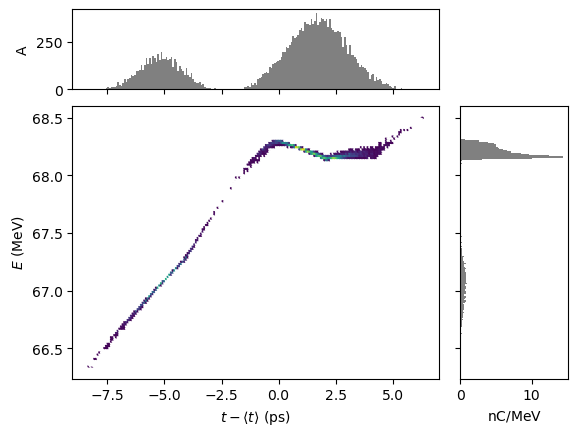

67913634.1430523


-10


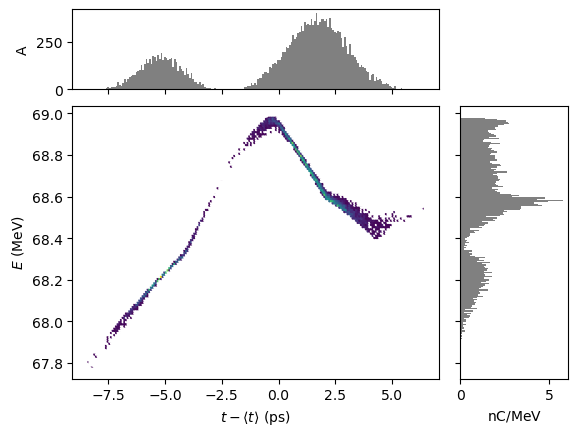

68571008.7121529


-5


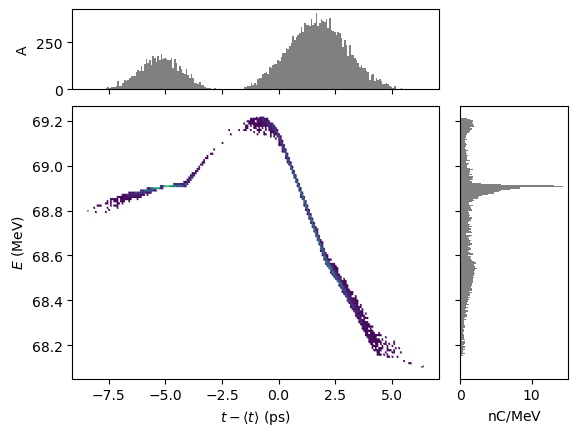

68757320.00616854


0


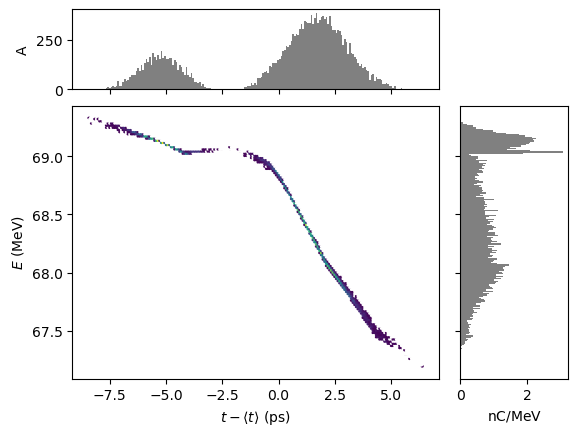

68466550.77984102


5


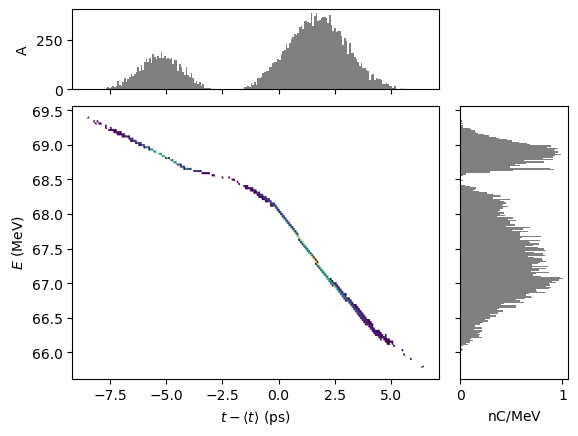

67696278.75843477


10


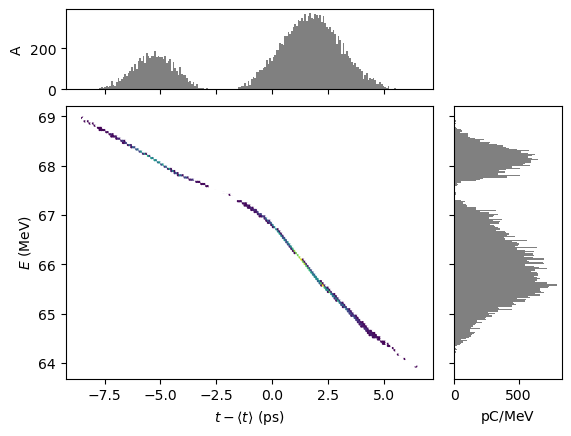

66447535.808365405


15


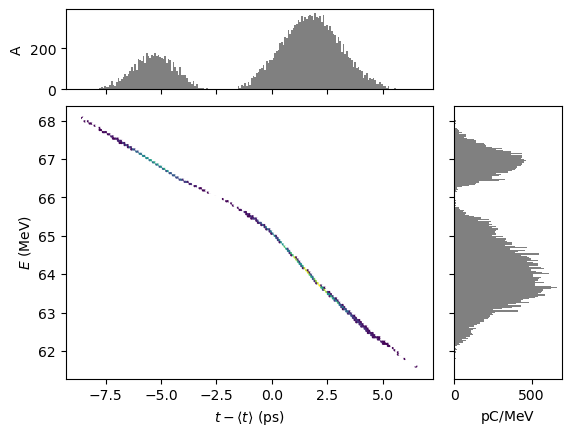

64724612.42403458




In [4]:
#Phase scan
import contextlib
import io



for L0APhaseOffset in np.arange(-15,20,5):
    print(L0APhaseOffset)
    
    with contextlib.redirect_stdout(io.StringIO()): #Silence the function
        runImpact(
            gridCount = 8,
            numMacroParticles = 1e4,
            GFILESuffix = "distgen_twobunch.yaml",
            L0APhaseOffset = L0APhaseOffset
        )


    P = ParticleGroup("/Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/beams/ImpactBeam.h5")
    display(plotMod(P, 'delta_t', 'energy',  bins=200))
    print(np.mean(P.energy))
    print("\n")

In [5]:
runImpact(
    gridCount = 32,
    numMacroParticles = 1e5,
    GFILESuffix = "distgen_twobunch.yaml",
    L0APhaseOffset = -10
)

Running Impact
Assuming default file path: /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
	 Impact: Autophasing
	 Impact: Distgen
	 Impact: Tracking
Running Impact-T in /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpse_zrnuq
/opt/homebrew/anaconda3/envs/bmadclone/bin/ImpactTexe
writing 100000 particles to /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao/impact/tmpse_zrnuq/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 100000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 1.848462511456037e-11 according to initial particles
Cathode start: Replaced Tini with -4.68716129620563e-12 according to initial particles
Setting total charge to 1.6000000000000005e-09 C
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: V2.3.1
 ! Copyright of The Regents of the University of California


In [6]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/ImpactBeam.h5'
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Loading default setLattice() values
Number of macro particles defined by input file


In [7]:
trackBeam(tao)

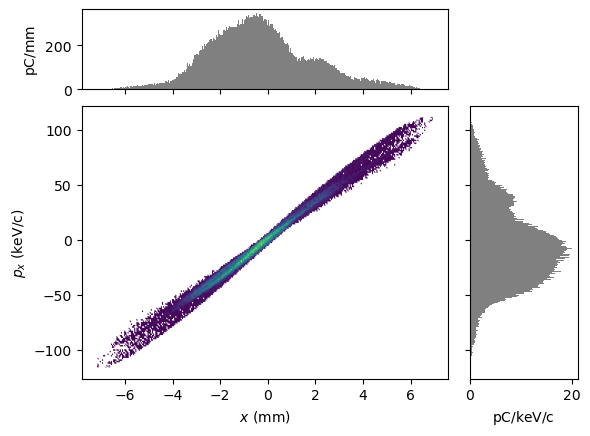

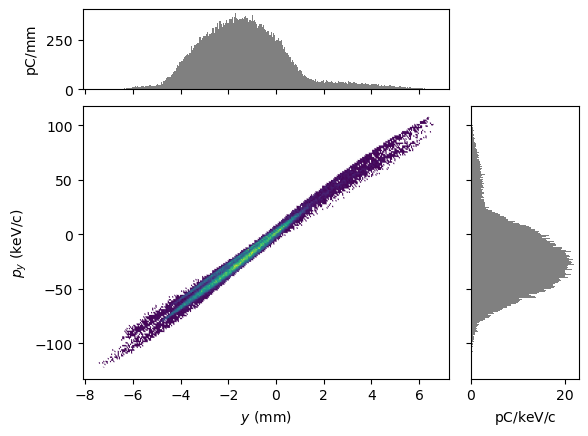

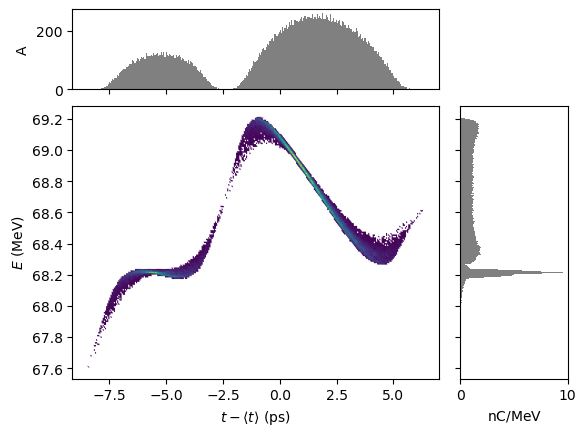

68607910.72374614

In [8]:
P =  ParticleGroup(data=tao.bunch_data("L0AFEND"))
display(plotMod(P, 'x', 'px',  bins=300))
display(plotMod(P, 'y', 'py',  bins=300))
display(plotMod(P, 'delta_t', 'energy',  bins=300))
np.mean(P.energy)

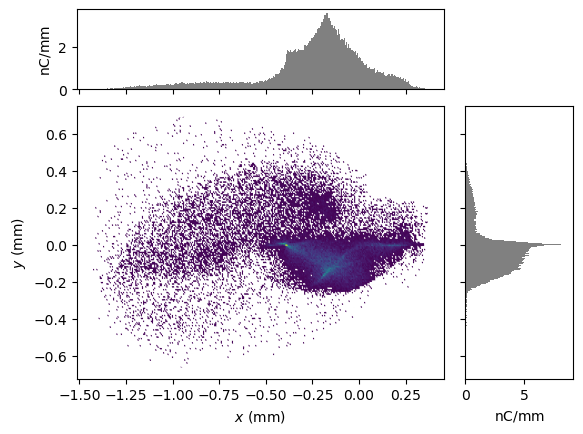

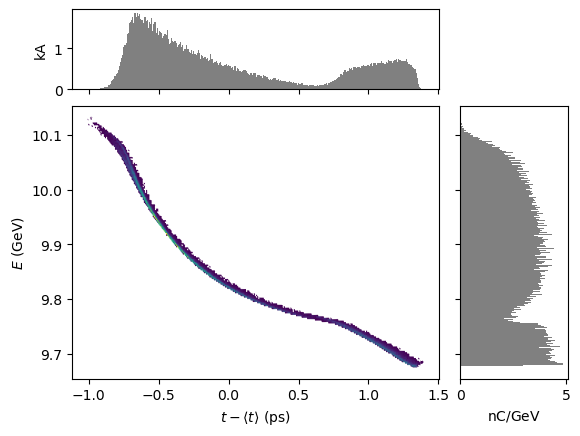

In [9]:
P =  ParticleGroup(data=tao.bunch_data("PENT"))
P = P[P.status == 1]
display(plotMod(P, 'x', 'y',  bins=300));
display(plotMod(P, 'delta_t', 'energy',  bins=300));

# Vs GPT

In [6]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample.h5',
    #inputBeamFilePathSuffix = '/beams/L0AFEND_facet2-lattice.h5',
)

trackBeam(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Loading default setLattice() values
Number of macro particles defined by input file


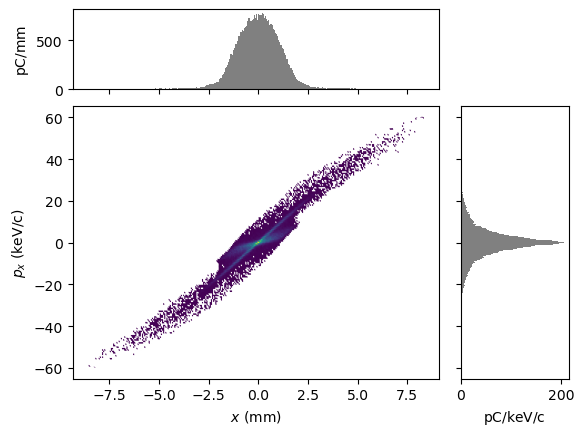

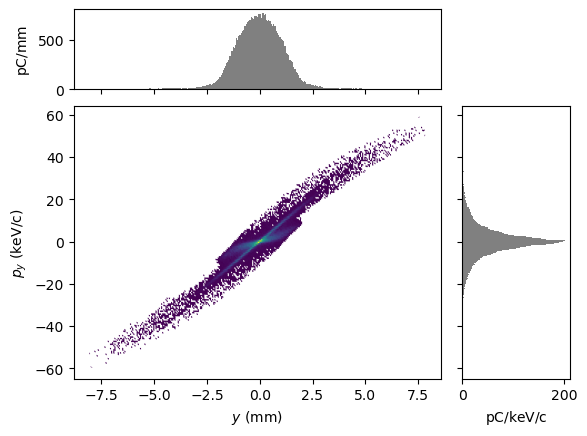

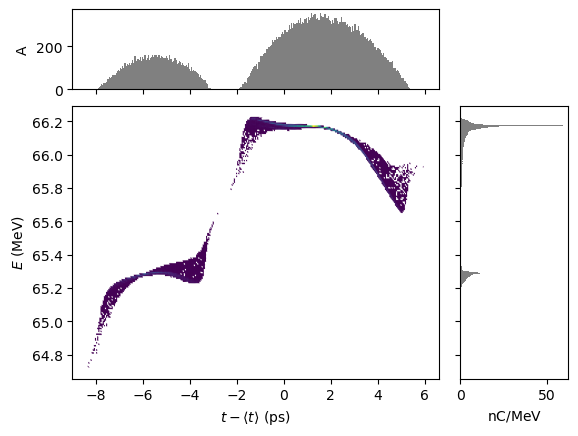

65908610.99263252

In [7]:
P =  ParticleGroup(data=tao.bunch_data("L0AFEND"))
display(plotMod(P, 'x', 'px',  bins=300))
display(plotMod(P, 'y', 'py',  bins=300))
display(plotMod(P, 'delta_t', 'energy',  bins=300))
np.mean(P.energy)

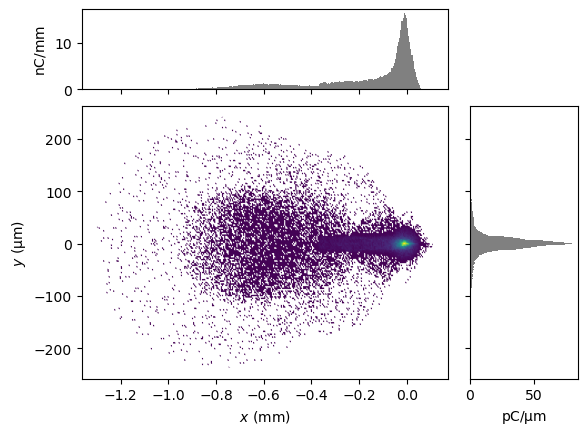

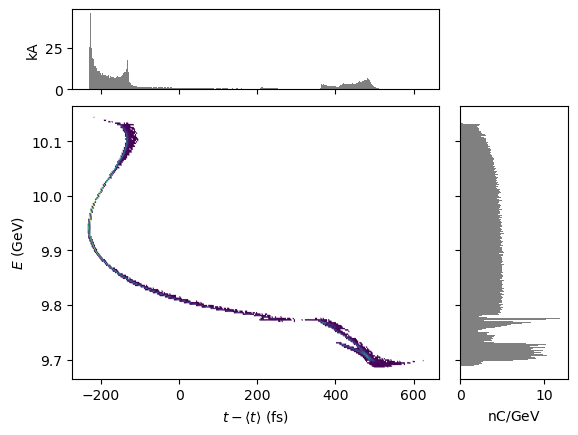

In [8]:
P =  ParticleGroup(data=tao.bunch_data("PENT"))
P = P[P.status == 1]
display(plotMod(P, 'x', 'y',  bins=300));
display(plotMod(P, 'delta_t', 'energy',  bins=300));